In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,Prev_Insured_binary,Vehicle_damage_binary,< 1 Year,> 2 Years,Age_scaled,Target
0,0,1,0,0,0.369231,0
1,1,0,1,0,0.046154,0
2,0,1,0,0,0.353846,0
3,1,0,0,0,0.615385,0
4,0,1,0,0,0.338462,0


Target
0    69878
1    32473
dtype: int64


<AxesSubplot:title={'center':'Distribution of target'}, xlabel='Target'>

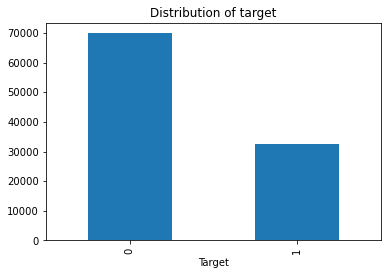

In [6]:
#Print class freq. through pandas: we group the data by the column target and we count the number of rows 
target_dist=df.groupby('Target').size()
print(target_dist)

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Visualize Class Counts
target_dist.plot.bar(x='',y='',title='Distribution of target')

In [7]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
#y.head()

In [8]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123
                                                   ) #fix random seed for replicability

print(X_train.shape,X_test.shape)

(71645, 5) (30706, 5)


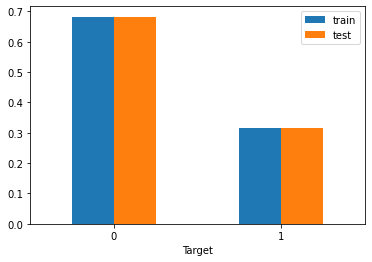

In [9]:
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels

In [13]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Create KNN Classifier
knn3 = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn3.predict(X_test)


In [15]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[16856  4108]
 [ 3887  5855]]


In [18]:
from sklearn.model_selection import GridSearchCV

#Create KNN Classifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,40)}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=90, n_jobs=-1, refit='f1')

In [19]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 39 candidates, totalling 117 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1

In [20]:
#summarize the results of your GRIDSEARCH
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))

means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

Best score: 0.658388 using {'n_neighbors': 37}
Mean 0.514847 Std (0.039820) with: {'n_neighbors': 1}
Mean 0.381481 Std (0.019359) with: {'n_neighbors': 2}
Mean 0.556867 Std (0.018631) with: {'n_neighbors': 3}
Mean 0.426106 Std (0.027088) with: {'n_neighbors': 4}
Mean 0.550943 Std (0.019559) with: {'n_neighbors': 5}
Mean 0.466576 Std (0.024011) with: {'n_neighbors': 6}
Mean 0.573503 Std (0.008744) with: {'n_neighbors': 7}
Mean 0.518979 Std (0.022819) with: {'n_neighbors': 8}
Mean 0.562082 Std (0.022216) with: {'n_neighbors': 9}
Mean 0.500531 Std (0.039404) with: {'n_neighbors': 10}
Mean 0.570450 Std (0.042888) with: {'n_neighbors': 11}
Mean 0.528262 Std (0.050198) with: {'n_neighbors': 12}
Mean 0.588632 Std (0.032222) with: {'n_neighbors': 13}
Mean 0.573006 Std (0.036157) with: {'n_neighbors': 14}
Mean 0.611586 Std (0.012145) with: {'n_neighbors': 15}
Mean 0.568398 Std (0.029900) with: {'n_neighbors': 16}
Mean 0.612560 Std (0.012136) with: {'n_neighbors': 17}
Mean 0.571981 Std (0.025567

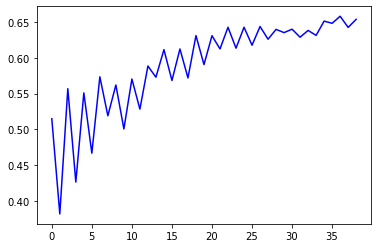

0.6583883336065898


In [21]:
import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

print(gs.best_score_)

In [22]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

In [23]:
#This is your prediction on the TEST SET
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [24]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics 

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m


***RESULTS ON TEST SET***
precision:  0.5986256044795113
recall:  0.7242865941285157
f1_score:  0.6554879464907799
accuracy:  0.7584511170455286


In [25]:
y_pred_train = best_model.predict(X_train)

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  0.60386630532972
recall:  0.735207425982139
f1_score:  0.6630956632146966
accuracy:  0.7629702002931119


In [26]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81     20964
           1       0.60      0.72      0.66      9742

    accuracy                           0.76     30706
   macro avg       0.73      0.75      0.73     30706
weighted avg       0.78      0.76      0.76     30706



In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[16233  4731]
 [ 2686  7056]]


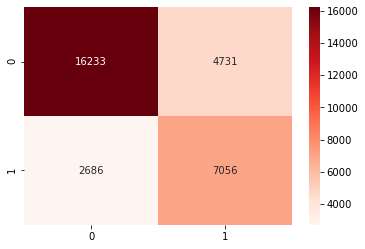

In [28]:
# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds"); #annot=True to annotate cells fmt: format


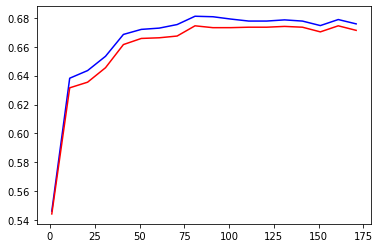

In [29]:
score_train=[]
score_test=[]

neighbors=range(1,180,10)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    score_train.append( metrics.f1_score(y_train, y_pred_train))
    score_test.append( metrics.f1_score(y_test, y_pred_test))


plt.plot (neighbors,score_train, color='blue', alpha=1.00)
plt.plot (neighbors,score_test, color='red', alpha=1.00)
plt.show()


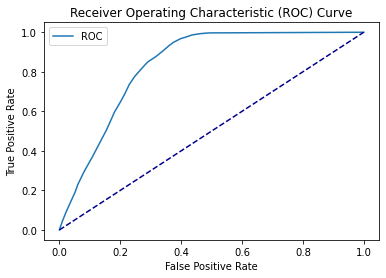

AUC: 0.83


In [30]:
model = KNeighborsClassifier(n_neighbors=36)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)